# Feature Engineering

## Importando bibliotecas

In [549]:
import pathlib
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import warnings
from tabulate import tabulate

In [550]:
warnings.filterwarnings('ignore')

## Importando os dados do notebook limpo

In [551]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

/Users/luccahiratsuca/Github/Insper/4 Semestre/Machine Learning/ames-project/data


In [552]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'

In [553]:
df = pd.read_pickle(clean_data_path)
df.head()

MS.SubClass MS.Zoning  Lot.Frontage  Lot.Area Lot.Shape Land.Contour  \
0          20        RL         141.0   31770.0       IR1          Lvl   
1          20        RH          80.0   11622.0       Reg          Lvl   
2          20        RL          81.0   14267.0       IR1          Lvl   
3          20        RL          93.0   11160.0       Reg          Lvl   
4          60        RL          74.0   13830.0       IR1          Lvl   

  Lot.Config Land.Slope Neighborhood Bldg.Type  ...  Sale.Type Sale.Condition  \
0     Corner        Gtl        NAmes      1Fam  ...  GroupedWD         Normal   
1     Inside        Gtl        NAmes      1Fam  ...  GroupedWD         Normal   
2     Corner        Gtl        NAmes      1Fam  ...  GroupedWD         Normal   
3     Corner        Gtl        NAmes      1Fam  ...  GroupedWD         Normal   
4     Inside        Gtl      Gilbert      1Fam  ...  GroupedWD         Normal   

  SalePrice Condition HasShed  HasAlley Exterior Garage.Age Remod.Age  \
0  5.332438      Norm   False     False  BrkFace       50.0      50.0   
1  5.021189     Roads   False     False  VinylSd       49.0      49.0   
2  5.235528      Norm   False     False  Wd Sdng       52.0      52.0   
3  5.387390      Norm   False     False  BrkFace       42.0      42.0   
4  5.278525      Norm   False     False  VinylSd       13.0      12.0   

  House.Age  
0      50.0  
1      49.0  
2      52.0  
3      42.0  
4      13.0  

[5 rows x 70 columns]

In [554]:
df.shape

(2877, 70)

In [555]:
# Função para avaliar o desempenho de vários modelos
def evaluate_models(X_train, X_test, y_train, y_test, models):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        results[name] = mse
    return results

## Skewness (Assimetria) das variáveis

Assim como sabemos, a assimetria de uma variável pode ter impactos negativos significativos em vários aspectos da modelagem estatística e de Machine Learning, dentre elas:


1. Viés em estimativas estatísiticas:

    1.1 Média e Mediana:
    - Em uma distribuição assimétrica, a média será puxada na direção da cauda longa. 
        - Por exemplo, em uma distribuição com assimetria positiva (cauda longa à direita), a média será maior que a mediana. Isso pode resultar em estimativas tendenciosas se a média for usada como medida de tendência central.

<br>
            
2. Impacto em Modelos:
    - Influenciar negativamente o desempenho de vários tipos de modelos de machine learning, especialmente aqueles sensíveis a outliers ou que assumem uma distribuição específica dos dados.


<br>

3. Interpretação em análise dos dados e visualização:
    - A assimetria nos dados pode tornar mais difícil interpretar os resultados dos modelos e as relações entre as variáveis. A relação entre variáveis independentes e dependentes pode ser mascarada ou distorcida devido à distribuição assimétrica.

<br>

4. Distorcer estimativas:
    - Levar a estimativas estatísticas tendenciosas, impactando a precisão e a confiabilidade do modelo.

<br>

5. Entre outros

Sabendo disso, iremos verificar a assimetria das variáveis e, se necessário, aplicar alguma transformação para tentar reduzir a assimetria.

Primeiramente, iremos verificar a assimetria das variáveis numéricas, de maneira visual:

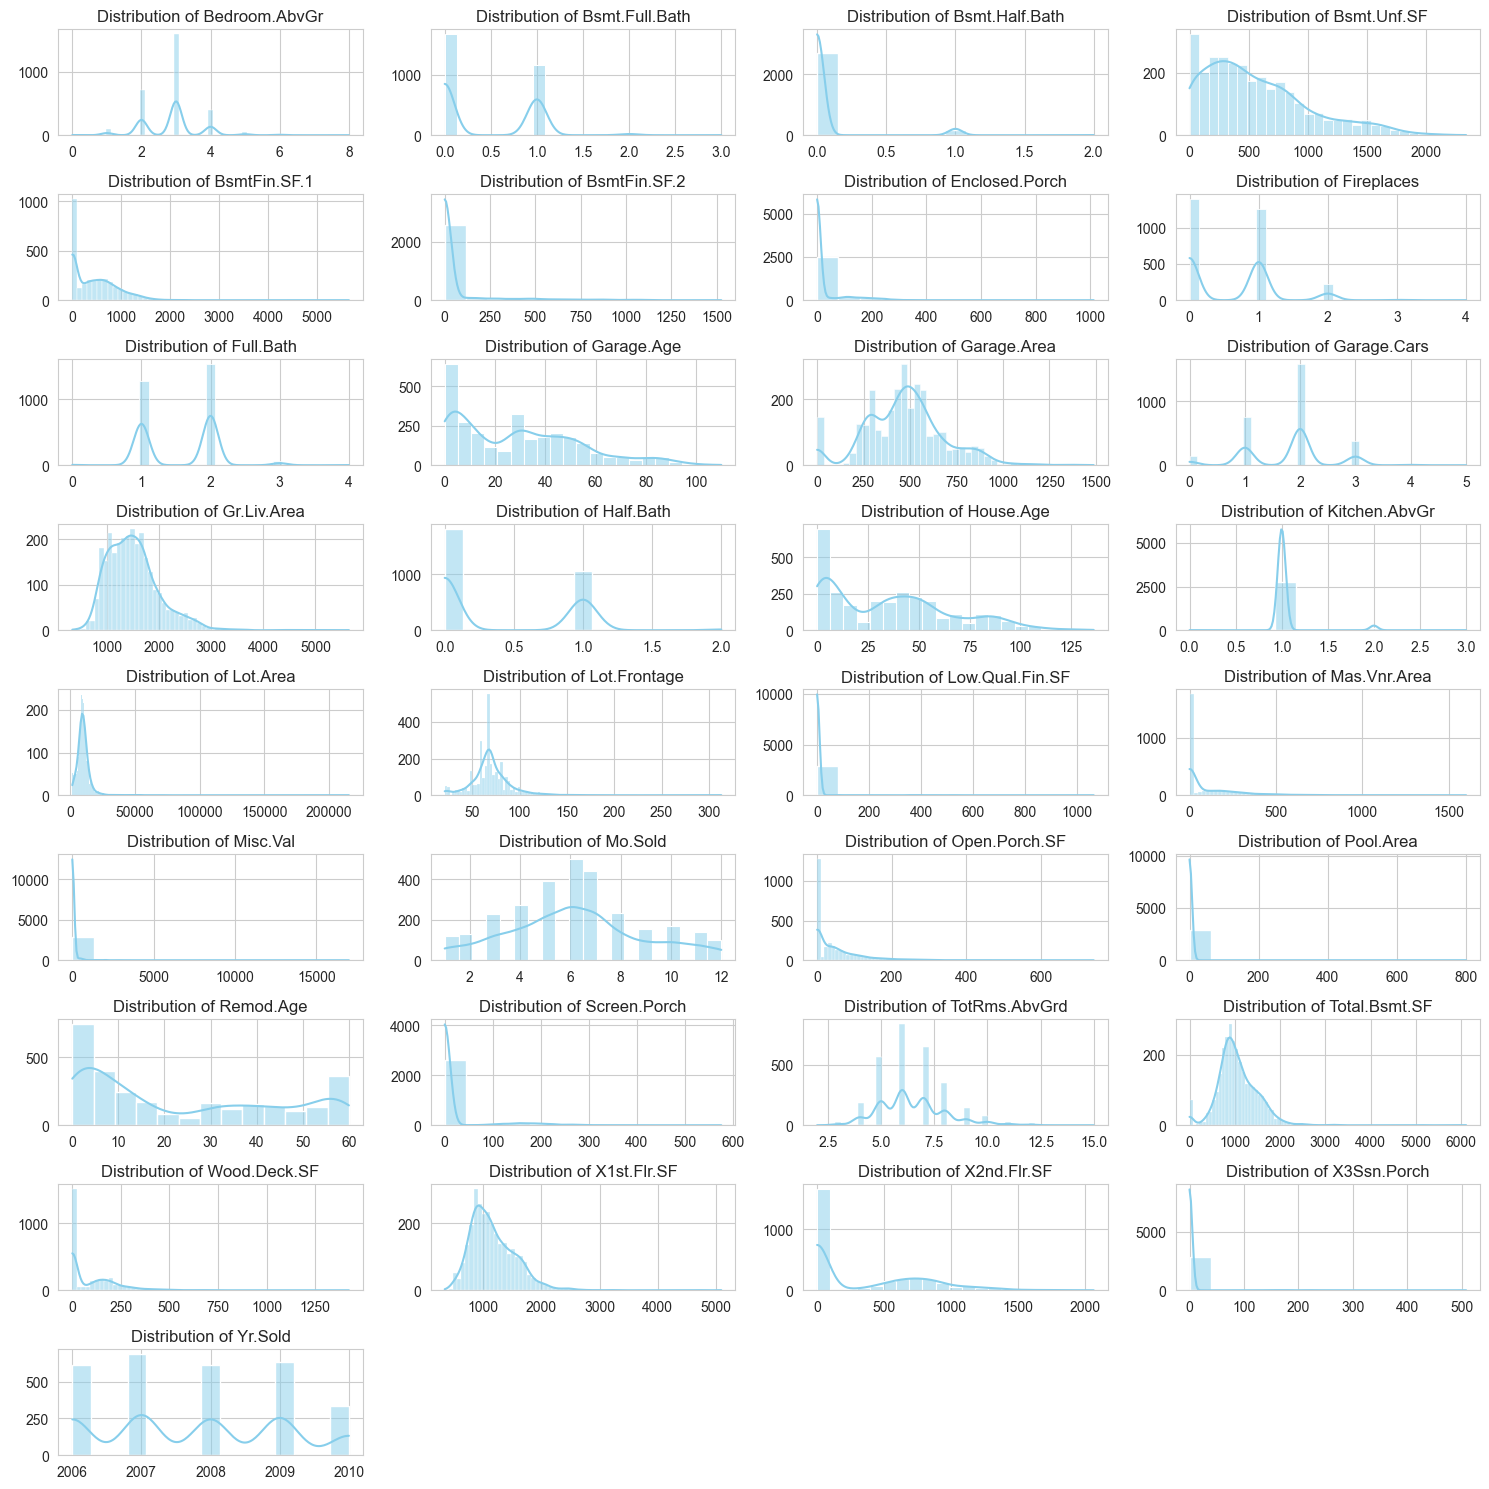

In [556]:
X = df.drop('SalePrice', axis=1)

numeric_cols = X.select_dtypes(include=[np.number]).columns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(15, 15))

# Create a grid of distribution plots for each numerical feature
for i, col in enumerate(sorted(numeric_cols), 1):
    plt.subplot(len(numeric_cols)//4 + 1, 4, i)
    sns.histplot(X[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('')

# Adjust the layout
plt.tight_layout()
plt.show()

In [557]:
from scipy.stats import skew

Verificando a assimetria das variáveis numéricas, de maneira numérica:

In [558]:
# Calcula a assimetria para cada coluna numérica
skewness = X[numeric_cols].apply(lambda x: skew(x.dropna()))
skewness = skewness.sort_values(ascending=False)

# Exibe os valores de assimetria
print(skewness)

Misc.Val           21.798366
Pool.Area          16.775040
Lot.Area           13.164608
Low.Qual.Fin.SF    12.315479
X3Ssn.Porch        11.347070
Kitchen.AbvGr       4.321702
BsmtFin.SF.2        4.126027
Enclosed.Porch      4.084489
Screen.Porch        3.918047
Bsmt.Half.Bath      3.912318
Mas.Vnr.Area        2.591007
Open.Porch.SF       2.445602
Wood.Deck.SF        1.836891
Lot.Frontage        1.717644
BsmtFin.SF.1        1.420483
X1st.Flr.SF         1.409879
Gr.Liv.Area         1.260704
Total.Bsmt.SF       1.190822
Bsmt.Unf.SF         0.917712
X2nd.Flr.SF         0.861838
TotRms.AbvGrd       0.754091
Fireplaces          0.725657
Half.Bath           0.685947
Garage.Age          0.665180
Bsmt.Full.Bath      0.610746
House.Age           0.606520
Remod.Age           0.464589
Bedroom.AbvGr       0.325526
Garage.Area         0.245807
Mo.Sold             0.196633
Full.Bath           0.154415
Yr.Sold             0.136235
Garage.Cars        -0.209811
dtype: float64


In [559]:
from scipy.stats import skew
import pandas as pd

def skew_transformation(data, skew_limit=0.5):
    """
    Apply a np.log1p transformation to the dataframe to reduce skewness.
    
    Parameters:
    data (pd.DataFrame): The input dataframe.
    skew_limit (float): The skewness threshold. Columns with skewness above this limit will be transformed.
    
    Returns:
    pd.DataFrame: The transformed dataframe.
    """
    transformed_data = data.copy()
    
    for col in data.select_dtypes(include=[np.number]).columns:
        if skew(data[col], nan_policy='omit') > skew_limit:
            transformed_data[col] = np.log1p(data[col])

    transformed_cols = transformed_data.columns[transformed_data.columns != data.columns].tolist()
    print(f'Number of columns transformed: {len(transformed_cols)}')
    if transformed_cols:
        print(f'Columns transformed: {transformed_cols}')
    
    return transformed_data

In [560]:
df = skew_transformation(df)

Number of columns transformed: 0


## Encoding das variáveis

In [561]:
categorical_columns = []
ordinal_columns = []
for col in df.select_dtypes('category').columns:
    if df[col].cat.ordered:
        ordinal_columns.append(col)
    else:
        categorical_columns.append(col)

In [562]:
categorical_columns

['MS.SubClass',
 'MS.Zoning',
 'Land.Contour',
 'Lot.Config',
 'Neighborhood',
 'Bldg.Type',
 'House.Style',
 'Roof.Style',
 'Mas.Vnr.Type',
 'Foundation',
 'Bsmt.Qual',
 'Bsmt.Cond',
 'Bsmt.Exposure',
 'BsmtFin.Type.1',
 'BsmtFin.Type.2',
 'Central.Air',
 'Garage.Type',
 'Garage.Finish',
 'Sale.Type',
 'Sale.Condition',
 'Condition',
 'Exterior']

In [563]:
ordinal_columns

['Lot.Shape',
 'Land.Slope',
 'Overall.Qual',
 'Overall.Cond',
 'Exter.Qual',
 'Exter.Cond',
 'Heating.QC',
 'Electrical',
 'Kitchen.Qual',
 'Functional',
 'Paved.Drive',
 'Fence']

### Encoding das variáveis ordinais

In [564]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df[ordinal_columns] = ordinal_encoder.fit_transform(df[ordinal_columns])
df.head()

MS.SubClass MS.Zoning  Lot.Frontage   Lot.Area  Lot.Shape Land.Contour  \
0          20        RL      4.955827  10.366309        0.0          Lvl   
1          20        RH      4.394449   9.360741        3.0          Lvl   
2          20        RL      4.406719   9.565775        0.0          Lvl   
3          20        RL      4.543295   9.320181        3.0          Lvl   
4          60        RL      4.317488   9.534668        0.0          Lvl   

  Lot.Config  Land.Slope Neighborhood Bldg.Type  ...  Sale.Type  \
0     Corner         0.0        NAmes      1Fam  ...  GroupedWD   
1     Inside         0.0        NAmes      1Fam  ...  GroupedWD   
2     Corner         0.0        NAmes      1Fam  ...  GroupedWD   
3     Corner         0.0        NAmes      1Fam  ...  GroupedWD   
4     Inside         0.0      Gilbert      1Fam  ...  GroupedWD   

   Sale.Condition  SalePrice Condition HasShed  HasAlley  Exterior  \
0          Normal   5.332438      Norm   False     False   BrkFace   
1          Normal   5.021189     Roads   False     False   VinylSd   
2          Normal   5.235528      Norm   False     False   Wd Sdng   
3          Normal   5.387390      Norm   False     False   BrkFace   
4          Normal   5.278525      Norm   False     False   VinylSd   

   Garage.Age Remod.Age House.Age  
0    3.931826      50.0  3.931826  
1    3.912023      49.0  3.912023  
2    3.970292      52.0  3.970292  
3    3.761200      42.0  3.761200  
4    2.639057      12.0  2.639057  

[5 rows x 70 columns]

Confirmando a transformação das variáveis ordinais:

In [565]:
df[ordinal_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2929
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lot.Shape     2877 non-null   float64
 1   Land.Slope    2877 non-null   float64
 2   Overall.Qual  2877 non-null   float64
 3   Overall.Cond  2877 non-null   float64
 4   Exter.Qual    2877 non-null   float64
 5   Exter.Cond    2877 non-null   float64
 6   Heating.QC    2877 non-null   float64
 7   Electrical    2877 non-null   float64
 8   Kitchen.Qual  2877 non-null   float64
 9   Functional    2877 non-null   float64
 10  Paved.Drive   2877 non-null   float64
 11  Fence         2877 non-null   float64
dtypes: float64(12)
memory usage: 292.2 KB


### Encoding das variáveis categóricas

In [566]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

Primeiro, precisamos converter o tipo das variáveis categóricas para string. Caso contrário, recebemos a seguinte mensagem ao tentar aplicar o OneHotEncoder:

```python
TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']
```

Assim:

In [567]:
df[categorical_columns] = df[categorical_columns].astype(str)

Agora, podemos aplicar o OneHotEncoder:

In [568]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), categorical_columns),
    ],
    remainder='passthrough', # Isso faz com que as colunas que não foram transformadas sejam mantidas
)

array_transformed = preprocessor.fit_transform(df)

new_categorical_columns = preprocessor.named_transformers_['onehot'].get_feature_names_out()
new_columns = new_categorical_columns.tolist() + [col for col in df.columns if col not in categorical_columns]

df = pd.DataFrame(array_transformed, columns=new_columns)
new_columns

['MS.SubClass_160',
 'MS.SubClass_190',
 'MS.SubClass_20',
 'MS.SubClass_30',
 'MS.SubClass_50',
 'MS.SubClass_60',
 'MS.SubClass_70',
 'MS.SubClass_80',
 'MS.SubClass_85',
 'MS.SubClass_90',
 'MS.SubClass_Other',
 'MS.Zoning_RH',
 'MS.Zoning_RL',
 'MS.Zoning_RM',
 'Land.Contour_HLS',
 'Land.Contour_Low',
 'Land.Contour_Lvl',
 'Lot.Config_CulDSac',
 'Lot.Config_FR2',
 'Lot.Config_FR3',
 'Lot.Config_Inside',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Bldg.Type_2fmCon',
 '

Verificando a transformação das variáveis categóricas:

In [569]:
for cat in categorical_columns:
    dummies = []
    for col in df.columns:
        if col.startswith(cat + "_"):
            dummies.append(f'"{col}"')
    dummies_str = ', '.join(dummies)
    print(f'From column "{cat}" we made {dummies_str}\n')

From column "MS.SubClass" we made "MS.SubClass_160", "MS.SubClass_190", "MS.SubClass_20", "MS.SubClass_30", "MS.SubClass_50", "MS.SubClass_60", "MS.SubClass_70", "MS.SubClass_80", "MS.SubClass_85", "MS.SubClass_90", "MS.SubClass_Other"

From column "MS.Zoning" we made "MS.Zoning_RH", "MS.Zoning_RL", "MS.Zoning_RM"

From column "Land.Contour" we made "Land.Contour_HLS", "Land.Contour_Low", "Land.Contour_Lvl"

From column "Lot.Config" we made "Lot.Config_CulDSac", "Lot.Config_FR2", "Lot.Config_FR3", "Lot.Config_Inside"

From column "Neighborhood" we made "Neighborhood_BrDale", "Neighborhood_BrkSide", "Neighborhood_ClearCr", "Neighborhood_CollgCr", "Neighborhood_Crawfor", "Neighborhood_Edwards", "Neighborhood_Gilbert", "Neighborhood_IDOTRR", "Neighborhood_MeadowV", "Neighborhood_Mitchel", "Neighborhood_NAmes", "Neighborhood_NPkVill", "Neighborhood_NWAmes", "Neighborhood_NoRidge", "Neighborhood_NridgHt", "Neighborhood_OldTown", "Neighborhood_SWISU", "Neighborhood_Sawyer", "Neighborhood_Saw

In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877 entries, 0 to 2876
Columns: 165 entries, MS.SubClass_160 to House.Age
dtypes: object(165)
memory usage: 3.6+ MB


## Engenharia de features

Abaixo iremos criar algumas features, as quais são derivadas de colunas preexistentes, a finalidade disso é tentar proporcionar uma visão mais rica e detalhada do conjunto de dados, potencialmente levando a melhores previsões e insights.

In [571]:
def engineer_features(data):
    data = data.copy()
    
    data["SqFtPerRoom"] = data["Gr.Liv.Area"] / (data["TotRms.AbvGrd"] +
                                                data["Full.Bath"] +
                                                data["Half.Bath"] +
                                                data["Kitchen.AbvGr"])

    data['Total_Home_Quality'] = data['Overall.Qual'] + data['Overall.Cond']

    data['Total_Bathrooms'] = (data['Full.Bath'] + (0.5 * data['Half.Bath']) +
                               data['Bsmt.Full.Bath'] + (0.5 * data['Bsmt.Half.Bath']))

    data["HighQualSF"] = (data["Gr.Liv.Area"] + data["X1st.Flr.SF"] + data["X2nd.Flr.SF"] +
                          0.5 * data["Garage.Area"] + 0.5 * data["Total.Bsmt.SF"] +
                          data["Mas.Vnr.Area"])

    return data

Abaixo iremos testar o impacto de manter ou descartar as colunas que foram utilizadas para criar as novas features. Iremos fazer isso utilizando a comparação da métrica MSE (Mean Squared Error) com alguns modelos.

In [572]:
# Colunas a serem removidas ou não
columns_to_drop = ['Gr.Liv.Area', 'TotRms.AbvGrd', 'Full.Bath', 'Half.Bath', 'Kitchen.AbvGr', 
                   'Overall.Qual', 'Overall.Cond', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'X1st.Flr.SF', 
                   'X2nd.Flr.SF', 'Garage.Area', 'Total.Bsmt.SF', 'Mas.Vnr.Area']


df = engineer_features(df)
X = df.drop('SalePrice', axis=1) 
y = df['SalePrice']

# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Avaliação com todas as features
results_all = evaluate_models(X_train, X_test, y_train, y_test, models)

# Avaliação sem as colunas originais
X_train_dropped = X_train.drop(columns_to_drop, axis=1)
X_test_dropped = X_test.drop(columns_to_drop, axis=1)
results_dropped = evaluate_models(X_train_dropped, X_test_dropped, y_train, y_test, models)

# Exibindo os resultados
print("MSE com todas as features:")
for model, mse in results_all.items():
    print(f"{model}: {mse}")

print("\nMSE sem as colunas originais:")
for model, mse in results_dropped.items():
    print(f"{model}: {mse}")


MSE com todas as features:
Linear Regression: 0.0026884851128517006
Ridge: 0.002651174617051123
Lasso: 0.0142675261239218
Random Forest: 0.0033183084830777088
Gradient Boosting: 0.0028657974348657834
Support Vector Regressor: 0.011755963336220556

MSE sem as colunas originais:
Linear Regression: 0.00318118097276855
Ridge: 0.003153662592456402
Lasso: 0.013991372606598614
Random Forest: 0.003369765259400036
Gradient Boosting: 0.00316907575087297
Support Vector Regressor: 0.0119586489970929


In [573]:
df = engineer_features(df)

A partir dessas informações, podemos concluir que mesmo criando 3 novas colunas que são derivadas de colunas preexistentes, se descartarmos as colunas preexistentes, o modelo não consegue prever tão bem quanto quando as colunas preexistentes são mantidas. Portanto, mesmo que as novas colunas sejam derivadas de colunas preexistentes, elas ainda contém informações que são relevantes para o modelo e, portanto, devem ser mantidas.

## Correlação

Temos que ter cuidado com a correlação entre as variáveis, pois, se houver correlação entre as variáveis independentes, isso pode causar problemas em alguns modelos de Machine Learning, como por exemplo, o modelo de regressão linear, uma vez que a correlação entre as variáveis independentes pode causar problemas de multicolinearidade.

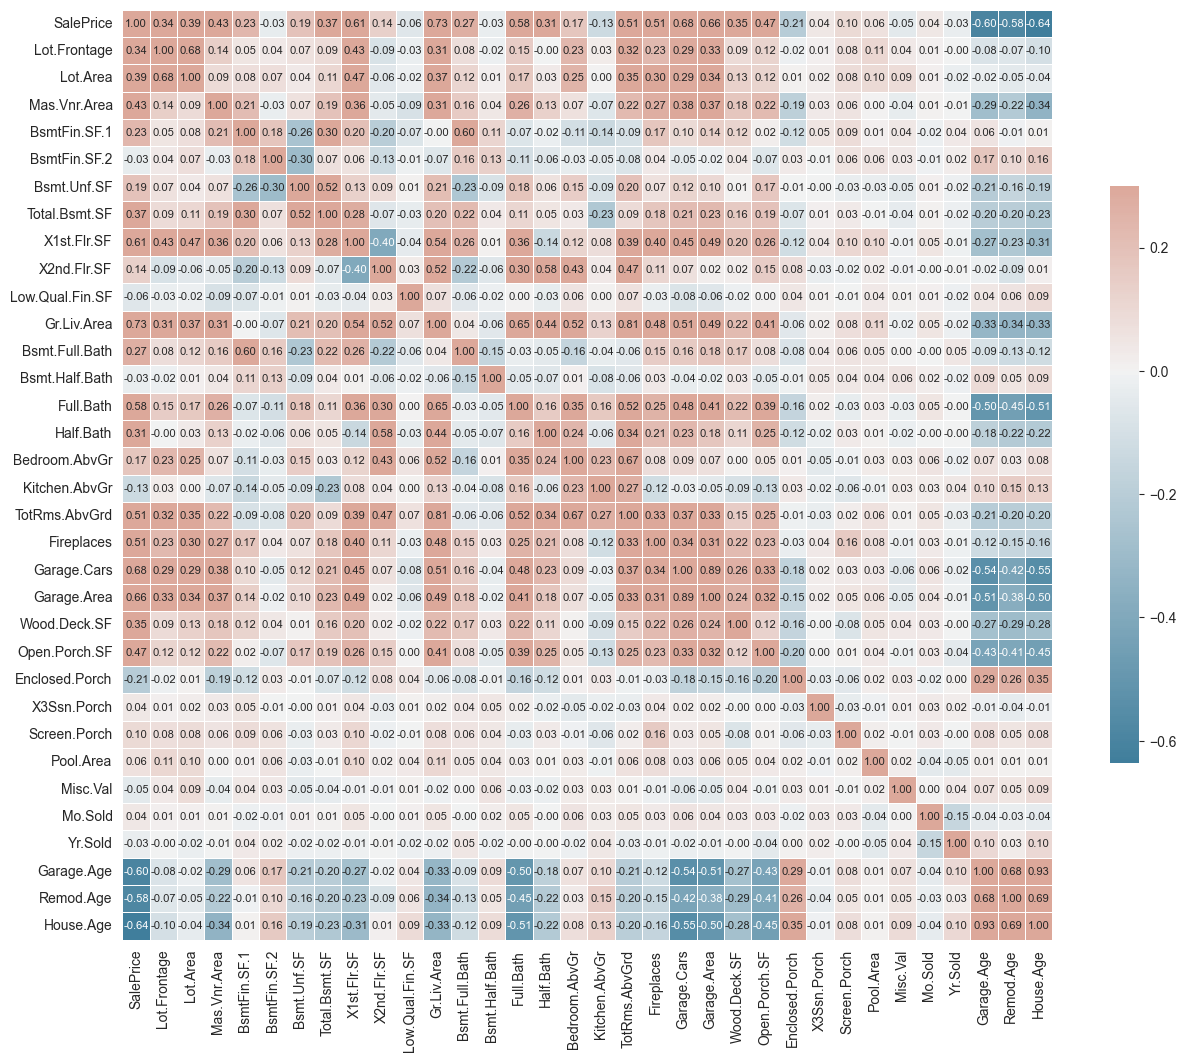

In [574]:
corr = df[['SalePrice', *numeric_cols]].corr()
plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt=".2f", annot_kws={"size": 8})

plt.xticks(rotation=90, size=10)
plt.yticks(rotation=0, size=10)

plt.show()

In [575]:
corr.SalePrice.sort_values(ascending=False)

SalePrice          1.000000
Gr.Liv.Area        0.727359
Garage.Cars        0.682475
Garage.Area        0.659309
X1st.Flr.SF        0.613604
Full.Bath          0.579069
Fireplaces         0.509290
TotRms.AbvGrd      0.505897
Open.Porch.SF      0.471781
Mas.Vnr.Area       0.432841
Lot.Area           0.388573
Total.Bsmt.SF      0.374917
Wood.Deck.SF       0.352874
Lot.Frontage       0.342063
Half.Bath          0.312224
Bsmt.Full.Bath     0.270114
BsmtFin.SF.1       0.230895
Bsmt.Unf.SF        0.186659
Bedroom.AbvGr      0.174658
X2nd.Flr.SF        0.137478
Screen.Porch       0.097377
Pool.Area          0.063872
Mo.Sold            0.042859
X3Ssn.Porch        0.042233
Bsmt.Half.Bath    -0.026891
Yr.Sold           -0.028056
BsmtFin.SF.2      -0.030510
Misc.Val          -0.051101
Low.Qual.Fin.SF   -0.063467
Kitchen.AbvGr     -0.129916
Enclosed.Porch    -0.207787
Remod.Age         -0.582060
Garage.Age        -0.596463
House.Age         -0.636650
Name: SalePrice, dtype: float64

Analisando correlação entre features:

In [576]:
corr_matrix = df.corr()

corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

corr_pairs = corr_pairs[corr_pairs['Feature1'] != corr_pairs['Feature2']]

corr_pairs = corr_pairs.iloc[(corr_pairs['Correlation'].abs()).argsort()[::-1]]

print(tabulate(corr_pairs, headers='keys', tablefmt='pretty', showindex=False))

+----------------------------+----------------------------+-------------------------+
|          Feature1          |          Feature2          |       Correlation       |
+----------------------------+----------------------------+-------------------------+
|        Bsmt.Cond_NA        |        Bsmt.Qual_NA        |           1.0           |
|       MS.SubClass_90       |      Bldg.Type_Duplex      |           1.0           |
|     BsmtFin.Type.1_NA      |        Bsmt.Cond_NA        |           1.0           |
|     BsmtFin.Type.1_NA      |        Bsmt.Qual_NA        |           1.0           |
|      Bldg.Type_Duplex      |       MS.SubClass_90       |           1.0           |
|        Bsmt.Cond_NA        |     BsmtFin.Type.1_NA      |           1.0           |
|        Bsmt.Qual_NA        |     BsmtFin.Type.1_NA      |           1.0           |
|        Bsmt.Qual_NA        |        Bsmt.Cond_NA        |           1.0           |
|        Garage.Area         |         HighQualSF     

Parece que muitos dos pares listados têm uma correlação muito alta (próxima a 1.0), sugerindo que essas características podem ser altamente interdependentes ou redundantes. Por exemplo, "Bsmt.Cond_NA" e "Bsmt.Qual_NA" têm uma correlação de 1.0, indicando que quando um desses recursos está ausente (NA), o outro também está provavelmente ausente.

Sabendo disso, iremos dropar as colunas que possuem uma correlação muito alta (próxima a 1.0), pois, queremos evitar problemas de multicolinearidade.

In [577]:
def drop_highly_correlated_features(df, threshold=0.9):
    """
    Drop one of two features that have a correlation higher than the threshold.
    
    Parameters:
    - df: DataFrame containing the features
    - threshold: Correlation value above which one feature will be dropped
    
    Returns:
    - DataFrame with reduced features
    """
    # Compute correlation matrix
    corr_matrix = df.corr().abs()
    
    # Create a mask for the upper triangle of the matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
    
    # Find features with correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # Drop the identified features
    df = df.drop(df[to_drop], axis=1)
    
    return df

In [578]:
df = drop_highly_correlated_features(df)

In [579]:
corr_matrix = df.corr()

corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

corr_pairs = corr_pairs[corr_pairs['Feature1'] != corr_pairs['Feature2']]

corr_pairs = corr_pairs.iloc[(corr_pairs['Correlation'].abs()).argsort()[::-1]]

print(tabulate(corr_pairs, headers='keys', tablefmt='pretty', showindex=False))

+----------------------------+----------------------------+-------------------------+
|          Feature1          |          Feature2          |       Correlation       |
+----------------------------+----------------------------+-------------------------+
|          HasShed           |          Misc.Val          |   0.8964436306611243    |
|          Misc.Val          |          HasShed           |   0.8964436306611243    |
|        Garage.Cars         |        Garage.Area         |   0.8884005804714363    |
|        Garage.Area         |        Garage.Cars         |   0.8884005804714363    |
|        BsmtFin.SF.2        |     BsmtFin.Type.2_Unf     |   -0.8829067127742365   |
|     BsmtFin.Type.2_Unf     |        BsmtFin.SF.2        |   -0.8829067127742365   |
|     House.Style_1Story     |        X2nd.Flr.SF         |   -0.8664439008584129   |
|        X2nd.Flr.SF         |     House.Style_1Story     |   -0.8664439008584129   |
|         Full.Bath          |        SqFtPerRoom     

## Salvando os dados

Após realizarmos esse feature engineering, iremos salvar os dados para serem utilizados no próximo notebook, no qual iremos verificar qual o melhor modelo para esse problema e como podemos tunar os hiperparâmetros desse modelo.

In [580]:
clean_data_path = DATA_DIR / 'processed' / 'feature_engineering.pkl'

In [581]:
with open(clean_data_path, 'wb') as file:
    pickle.dump(df, file)

## Testando o modelo após o feature engineering

In [582]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [583]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [584]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [585]:
ypred = model.predict(X_test)

In [586]:
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(y_test, ypred))

In [587]:
RMSE

0.053881668234290574

In [588]:
error_percent = 100 * (10**RMSE - 1)
print(f'Average error is {error_percent:.2f}%')

Average error is 13.21%
